In [ ]:

from src.translator_component_toolkit import translator_metakg
from src.translator_component_toolkit import translator_kpinfo

import matplotlib.pyplot as plt
import networkx as nx
import yaml

In [6]:
# Preparation 
# Step1: List all the APIs in the translator system
Translator_KP_info,APInames= translator_kpinfo.get_translator_kp_info()
print(len(Translator_KP_info))
# Step 2: Get metaKG and all predicates from Translator APIs through the SmartAPI system
metaKG = translator_metakg.get_KP_metadata(APInames) 
print(metaKG.shape)
# Add metaKG from Plover API based KG resources
APInames,metaKG = translator_metakg.add_plover_API(APInames, metaKG)
print(metaKG.shape)
# Step 3: list metaKG information
All_predicates = list(set(metaKG['Predicate']))
All_categories = list((set(list(set(metaKG['Subject']))+list(set(metaKG['Object'])))))
API_withMetaKG = list(set(metaKG['API']))
print(len(API_withMetaKG))
print(len(All_predicates))
print(len(All_categories))

# ARA list
API_withMetaKG = set(metaKG['API'])
print("ARA list:", set(APInames.keys()) - API_withMetaKG)

53
(10580, 5)
(22129, 5)
42
184
108
ARA list: {'Workflow-runner(Trapi v1.5.0)', 'Sri-answer-appraiser(Trapi v1.5.0)', 'mediKanren', 'Cqs(Trapi v1.5.0)', 'Autonomous Relay System (ARS) TRAPI', 'OpenPredict API', 'Aragorn(Trapi v1.5.0)', 'Sri-node-normalizer(Trapi v1.5.0)', 'Answer-coalesce(Trapi v1.5.0)', 'ARAX Translator Reasoner - TRAPI 1.5.0'}


In [7]:
APInames

{'RTX KG2 - TRAPI 1.5.0': 'https://kg2cploverdb.ci.transltr.io/kg2c/query',
 'BioThings Explorer (BTE) TRAPI': 'https://bte.transltr.io/v1/query/',
 'SPOKE KP for TRAPI 1.5': 'https://spokekp.transltr.io/api/v1.5/query/',
 'ARAX Translator Reasoner - TRAPI 1.5.0': 'https://arax.transltr.io/api/arax/v1.4/query/',
 'Connections Hypothesis Provider API': 'https://chp-api.transltr.io/query/',
 'COHD TRAPI': 'https://cohd-api.transltr.io/api/query/',
 'Gene-List Network Enrichment Analysis': 'https://translator.broadinstitute.org/gelinea-trapi/v1.5/query/',
 'mediKanren': 'https://medikanren-trapi.transltr.io/query/',
 'Microbiome KP - TRAPI 1.5.0': 'https://multiomics.rtx.ai:9990/mbkp/query',
 'CATRAX Pharmacogenomics KP - TRAPI 1.5.0': 'https://multiomics.rtx.ai:9990/PharmacogenomicsKG/query',
 'Automat-binding-db(Trapi v1.5.0)': 'https://automat.transltr.io/binding-db/query/',
 'Text Mined Cooccurrence API': 'https://cooccurrence.transltr.io/query/',
 'Clinical Trials KP - TRAPI 1.5.0': 

In [12]:

# find the KG in one individual API (optional)
metaKG.loc[metaKG['API'] == 'CATRAX BigGIM DrugResponse Performance Phase KP - TRAPI 1.5.0',['API','Predicate','Subject','Object']].drop_duplicates()

,API,Predicate,Subject,Object
10580,CATRAX BigGIM DrugResponse Performance Phase K...,biolink:expressed_in,biolink:Gene,biolink:Cell
10581,CATRAX BigGIM DrugResponse Performance Phase K...,biolink:physically_interacts_with,biolink:Gene,biolink:Gene
10582,CATRAX BigGIM DrugResponse Performance Phase K...,biolink:gene_associated_with_condition,biolink:Gene,biolink:Disease
10583,CATRAX BigGIM DrugResponse Performance Phase K...,biolink:associated_with_sensitivity_to,biolink:Gene,biolink:SmallMolecule
10584,CATRAX BigGIM DrugResponse Performance Phase K...,biolink:associated_with_resistance_to,biolink:Gene,biolink:SmallMolecule
10585,CATRAX BigGIM DrugResponse Performance Phase K...,biolink:associated_with_resistance_to,biolink:Gene,biolink:MolecularMixture
10586,CATRAX BigGIM DrugResponse Performance Phase K...,biolink:associated_with_sensitivity_to,biolink:Gene,biolink:MolecularMixture
10587,CATRAX BigGIM DrugResponse Performance Phase K...,biolink:biomarker_for,biolink:Gene,biolink:Disease
10588,CATRAX BigGIM DrugResponse Performance Phase K...,biolink:physically_interacts_with,biolink:SmallMolecule,biolink:Gene
10589,CATRAX BigGIM DrugResponse Performance Phase K...,biolink:physically_interacts_with,biolink:MolecularMixture,biolink:Gene


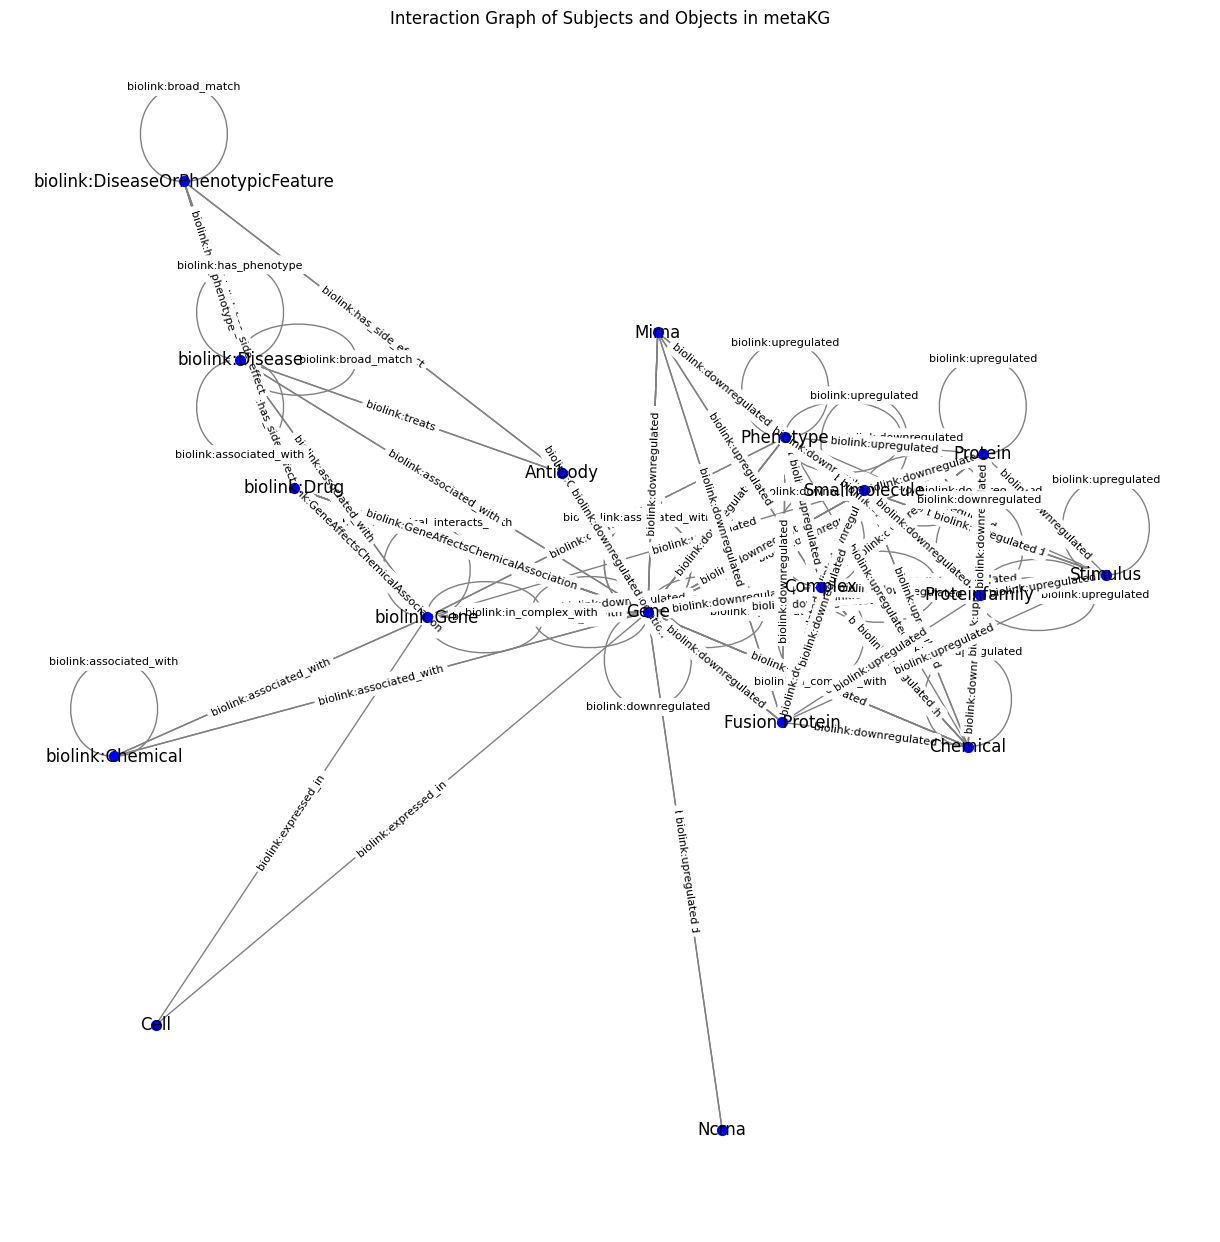

In [11]:
# draw the interaction graph between subject and object in the metaKG using networkx
# first, we need to drop the interactions between subjects and objects that both subjects and objects are the same
#metaKG = metaKG[metaKG['Subject'] != metaKG['Object']]
# second, we need to filter the metaKG to only include the selected categories
#metaKG = metaKG[metaKG['Subject'].isin(selected_categories) | metaKG['Object'].isin(selected_categories)]
selected_KGs = ['CATRAX Pharmacogenomics KP - TRAPI 1.5.0', 
            
                ]

metaKG_sele = metaKG[metaKG['API'].isin(selected_KGs)]

# build a multigraph to capture all edges (including duplicates) and their predicates
G = nx.MultiGraph()
for _, row in metaKG_sele.iterrows():
        G.add_edge(row['Subject'], row['Object'], predicate=row['Predicate'])

# layout and draw nodes + edges
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.5, iterations=20)
nx.draw(G, pos,
                with_labels=True,
                node_size=50,
                font_size=12,
                font_color='black',
                node_color='blue',
                edge_color='gray')

# draw edge labels
edge_labels = nx.get_edge_attributes(G, 'predicate')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)
plt.title('Interaction Graph of Subjects and Objects in metaKG')
plt.show()